In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

from textblob.sentiments import NaiveBayesAnalyzer

import pandas as pd
import sqlite3
from textblob import TextBlob

import seaborn as sns
sns.set(color_codes=True)

# encoding=utf8
import sys
reload(sys)
sys.setdefaultencoding('utf8')

import spacy
nlp = spacy.load('en')

import re

In [264]:
df = pd.read_csv('../pitchfork2.csv')

# df['word_count'] = df['content'].str.count('\w+')
# df['adj_count'] = df['content_adj'].str.count('\w+')

# df['avg_word_length'] = df['content'].str.count('[^ ]') / df['word_count']
# df['adj_word_length'] = df['content_adj'].str.count('[^ ]') / df['content_adj'].str.count('\w+')
# df['adj_freq'] = df['adj_count'] / df['word_count']

In [73]:
years = np.arange(1999, 2018)
df_new = df[df['new_album'] == 1]
df_reissue = df[df['new_album'] == 0]

In [266]:
df_spot = pd.read_csv('spotifydata2.csv')
df_spot2 = pd.read_csv('../spotifydata.csv')

In [267]:
df_spot = pd.concat([df_spot, df_spot2])

In [268]:
df_spot['artist'] = df_spot['artist'].str.lower()

In [269]:
df_spot['year'] = df_spot['album_release_year'].str[0:4].astype(int)

In [295]:
df_spot_grouped = df_spot.groupby(['artist', 'album_name', 'album_release_year']).agg([np.sum, np.mean, np.std])
df_spot_grouped.reset_index(inplace=True)
df_spot_grouped['title'] = df_spot_grouped['album_name'].str.lower()
df_spot_grouped['title'] = df_spot_grouped['title'].str.split('(')
df_spot_grouped['title'] = df_spot_grouped['title'].str[0].str.strip()

In [296]:
df_spot_grouped[df_spot_grouped['artist'] == 'wilco']

artist                           album_name album_release_year  \
                                                                       
45031  wilco                      A ghost is born         2004-06-21   
45032  wilco                A.M. (Deluxe Edition)         1995-01-01   
45033  wilco                          Being There         1996-01-01   
45034  wilco  Kicking Television, Live in Chicago         2005-11-15   
45035  wilco                             Schmilco         2016-09-09   
45036  wilco                         Sky Blue Sky         2007-05-14   
45037  wilco                            Star Wars         2015-07-17   
45038  wilco                          Summerteeth         1999-03-08   
45039  wilco      The Whole Love (Deluxe Edition)         2011-09-27   
45040  wilco                    Wilco [the album]         2009-01-01   
45041  wilco                 Yankee Hotel Foxtrot         2002-04-16   

      album_popularity            danceability                       energy  \
                   sum  mean  std          sum      mean       std      sum   
45031              936  39.0  0.0      11.4476  0.476983  0.182733  11.0160   
45032             1360  34.0  0.0      19.6720  0.491800  0.110417  28.3860   
45033             1710  45.0  0.0      19.4300  0.511316  0.119045  23.3660   
45034             1320  33.0  0.0      14.6360  0.365900  0.089962  24.3780   
45035             1344  56.0  0.0      15.7120  0.654667  0.112629  10.8098   
45036             1632  48.0  0.0      18.2620  0.537118  0.120857  18.4980   
45037              968  44.0  0.0      12.2160  0.555273  0.145376  14.8720   
45038             1768  52.0  0.0      16.0560  0.472235  0.157624  20.7160   
45039             1472  46.0  0.0      16.2100  0.506563  0.114324  18.4500   
45040             1056  44.0  0.0      14.7960  0.616500  0.061020  14.8460   
45041             1342  61.0  0.0      12.0780  0.549000  0.210374  11.1280   

                      ...                  time_signature                      \
                      ...                             sum      mean       std   
45031                 ...                            94.0  3.916667  0.282330   
45032                 ...                           154.0  3.850000  0.361620   
45033                 ...                           148.0  3.894737  0.311012   
45034                 ...                           158.0  3.950000  0.220721   
45035                 ...                            94.0  3.916667  0.282330   
45036                 ...                           128.0  3.764706  0.430562   
45037                 ...                            88.0  4.000000  0.000000   
45038                 ...                           128.0  3.764706  0.955330   
45039                 ...                           128.0  4.000000  0.000000   
45040                 ...                            96.0  4.000000  0.000000   
45041                 ...                            86.0  3.909091  0.294245   

      track_popularity                         year             \
                   sum       mean        std    sum  mean  std   
45031              636  26.500000   2.146787  48096  2004  0.0   
45032              726  18.150000   2.646236  79800  1995  0.0   
45033             1103  29.026316   4.365013  75848  1996  0.0   
45034              644  16.100000   3.086779  80200  2005  0.0   
45035              958  39.916667   6.613009  48384  2016  0.0   
45036              996  29.294118   7.047585  68238  2007  0.0   
45037              693  31.500000   4.102845  44330  2015  0.0   
45038             1080  31.764706  10.441928  67966  1999  0.0   
45039              962  30.062500   5.951077  64352  2011  0.0   
45040              650  27.083333   7.773515  48216  2009  0.0   
45041              998  45.363636   7.267314  44044  2002  0.0   

                                     title  
                                            
45031                      a ghost is 

In [297]:
df_spot_grouped.columns = [' '.join(col).strip() for col in df_spot_grouped.columns.values]


In [298]:
df_spot_grouped['order_of_release'] = df_spot_grouped.groupby('artist')['album_release_year'].rank(ascending=True)

In [299]:
df_spot_grouped[df_spot_grouped['artist'] == 'weird al yankovic']

,artist,album_name,album_release_year,album_popularity sum,album_popularity mean,album_popularity std,danceability sum,danceability mean,danceability std,energy sum,...,time_signature mean,time_signature std,track_popularity sum,track_popularity mean,track_popularity std,year sum,year mean,year std,title,order_of_release
44763,weird al yankovic,"""Weird Al"" Yankovic",1983-01-01,420,35.0,0.0,7.517,0.626417,0.131180,7.679,...,4.000000,0.000000,274,22.833333,3.761850,23796,1983,0.0,"""weird al"" yankovic",1.0
44764,weird al yankovic,Alapalooza,1993-01-01,432,36.0,0.0,7.408,0.617333,0.160819,9.353,...,4.000000,0.000000,268,22.333333,7.877855,23916,1993,0.0,alapalooza,8.0
44765,weird al yankovic,Alpocalypse,2011-06-17,600,50.0,0.0,7.630,0.635833,0.132705,6.989,...,4.000000,0.000000,433,36.083333,4.962740,24132,2011,0.0,alpocalypse,14.0
44766,weird al yankovic,Bad Hair Day,1996-12-31,576,48.0,0.0,7.231,0.602583,0.119108,8.279,...,3.916667,0.288675,376,31.333333,7.075352,23952,1996,0.0,bad hair day,10.0
44767,weird al yankovic,Dare To Be Stupid,1985-01-01,418,38.0,0.0,7.604,0.691273,0.114118,8.268,...,3.909091,0.301511,290,26.363636,3.695206,21835,1985,0.0,dare to be stupid,3.0
44768,weird al yankovic,Even Worse,1988-01-01,407,37.0,0.0,7.885,0.716818,0.128623,7.149,...,4.000000,0.000000,269,24.454545,4.633867,21868,1988,0.0,even worse,5.0
44769,weird al yankovic,In 3-D,1984-01-01,429,39.0,0.0,7.313,0.664818,0.168290,8.414,...,3.909091,0.301511,277,25.181818,5.671299,21824,1984,0.0,in 3-d,2.0
44770,weird al yankovic,Mandatory Fun,2014-07-15,648,54.0,0.0,7.046,0.587167,0.178058,7.873,...,4.000000,0.000000,486,40.500000,5.485518,24168,2014,0.0,mandatory fun,15.0
44771,weird al yankovic,Off The Deep End,1992-01-01,407,37.0,0.0,7.149,0.649909,0.184264,7.434,...,4.000000,0.000000,281,25.545455,3.559877,21912,1992,0.0,off the deep end,7.0
44772,weird al yankovic,Permanent Record: Al In The Box,1994-01-01,880,44.0,0.0,13.505,0.675250,0.154071,14.637,...,3.950000,0.223607,448,22.400000,3.844340,39880,1994,0.0,permanent record: al in the box,9.0


In [300]:
df_spot_grouped.to_csv('spotify_with_rank.csv')

In [291]:
df.drop(['num_years_since_release', 'year'], axis=1, inplace=True)

ValueError: labels ['num_years_since_release' 'year'] not contained in axis

In [117]:
title_artists = []
for each in na_artists:
    title_artists.append(each.title())

In [118]:
len(title_artists)

5159

In [233]:
title_artists.index('Parlour')

4008

In [119]:
pd.DataFrame(title_artists).to_csv('title_artists.csv')

In [277]:
df = df.merge(df_spot_grouped, on=['artist', 'title'])

In [156]:
import statsmodels.api as sm

In [180]:
df = df.reset_index()

In [182]:
df['danceability mean_x'].values

array([0.6355384615384614, 0.6581999999999999, 0.7889999999999999, ...,
       0.39933333333333326, 0.4509166666666668, 0.6190555555555555], dtype=object)

In [189]:
df['danceability']

0        0.635538
1          0.6582
2           0.789
3          0.6121
4        0.693474
5           0.494
6          0.5942
7        0.512615
8           0.809
9        0.594222
10       0.777267
11         0.5338
12       0.683688
13         0.4694
14         0.6828
15       0.590556
16       0.511833
17       0.294333
18        0.62025
19       0.423182
20       0.702667
21       0.638765
22       0.349333
23       0.528091
24          0.589
25         0.4012
26       0.715571
27        0.14924
28       0.120225
29       0.665687
           ...   
10431    0.521833
10432    0.517167
10433      0.5993
10434    0.488545
10435    0.468889
10436    0.323929
10437      0.6745
10438    0.322462
10439    0.469583
10440    0.772563
10441    0.498533
10442      0.7475
10443    0.387273
10444    0.550286
10445    0.540727
10446    0.484571
10447      0.7318
10448    0.426923
10449    0.357636
10450      0.5174
10451    0.443812
10452       0.487
10453    0.472235
10454    0.493059
10455    0

In [202]:
for each in df.select_dtypes(['number']):
    print each

In [205]:
for each in df.select_dtypes(['number']):
    Y = df['score']
    X = df[each].astype(float)
    X = sm.add_constant(X)

    model = sm.OLS(Y,X)
    results = model.fit()
    print each
    print results.rsquared

In [87]:
artists = df[df['tempo'] == "None"]['artist'].astype(list)

In [116]:
na_artists = df[df['tempo'] == "None"]['artist'].unique().astype(list)

In [213]:
df_spot_grouped[df_spot_grouped['artist'] == 'wilco']['title']

'a ghost is born'

In [211]:
df[df['artist'] == 'wilco'].sort_values('year', ascending=False)

,level_0,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,...,duration_ms std_y,time_signature sum_y,time_signature mean_y,time_signature std_y,track_popularity sum_y,track_popularity mean_y,track_popularity std_y,year sum_y,year mean_y,year std_y
1026,1026,1616,1695,5929da95d7a71d1ea5699c02,schmilco,wilco,https://pitchfork.com/reviews/albums/22355-sch...,7.0,0,0,...,28903.913955,47.0,3.916667,0.288675,479,39.916667,6.761634,24192,2016,0.0
1835,1835,2976,3131,5929deb0d7a71d1ea569a065,star wars,wilco,https://pitchfork.com/reviews/albums/20838-sta...,7.7,0,0,...,60084.138117,44.0,4.000000,0.000000,346,31.454545,4.227615,22165,2015,0.0
7261,7261,12645,13136,5929dab213d197565213cde2,sky blue sky,wilco,https://pitchfork.com/reviews/albums/10219-sky...,5.2,0,0,...,61573.557235,64.0,3.764706,0.437237,498,29.294118,7.156856,34119,2007,0.0
8906,8906,16080,16722,5929e3585e6ef95969325222,a ghost is born,wilco,https://pitchfork.com/reviews/albums/8680-a-gh...,6.6,0,0,...,221654.746471,47.0,3.916667,0.288675,318,26.500000,2.195036,24048,2004,0.0
9892,9892,18294,19035,5929db4e5e6ef959693249bc,yankee hotel foxtrot,wilco,https://pitchfork.com/reviews/albums/8676-yank...,10.0,0,0,...,83411.686984,43.0,3.909091,0.301511,499,45.363636,7.446781,22022,2002,0.0
10453,10453,19607,20378,5929e2c013d197565213d619,summerteeth,wilco,https://pitchfork.com/reviews/albums/8677-summ...,9.4,0,0,...,63614.961681,64.0,3.764706,0.970143,540,31.764706,10.603828,33983,1999,0.0


In [39]:
df['num_years_since_release'] = df['pub_year'] - df['year_y']

In [40]:
df.shape

(10461, 55)

In [209]:
df[df['artist'] == 'bon iver']

,level_0,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,...,duration_ms std_y,time_signature sum_y,time_signature mean_y,time_signature std_y,track_popularity sum_y,track_popularity mean_y,track_popularity std_y,year sum_y,year mean_y,year std_y
973,973,1539,1612,5929da59c0084474cd0c456a,"22, a million",bon iver,https://pitchfork.com/reviews/albums/22420-22-...,9.0,1,0,...,55545.973373,37.0,3.700000,0.483046,615,61.500000,3.135815,20160,2016,0.0
7019,7019,12149,12614,5929d96c0c2bba1b7de0221c,"for emma, forever ago",bon iver,https://pitchfork.com/reviews/albums/10709-for...,8.1,0,0,...,87865.324408,34.0,3.777778,0.440959,289,32.111111,7.096556,18072,2008,0.0


In [41]:
df[df['best_new_music'] == 1].groupby('pub_year')['album_popularity'].mean()

pub_year
2003    24.740741
2004    33.520000
2005    36.851852
2006    40.111111
2007    32.906250
2008    30.950000
2009    36.380952
2010    33.560000
2011    35.000000
2012    30.360000
2013    42.192308
2014    37.576923
2015    42.375000
2016    47.132075
2017    50.388889
Name: album_popularity, dtype: float64

In [43]:
df_2016 = df[df['pub_year'] == 2016]

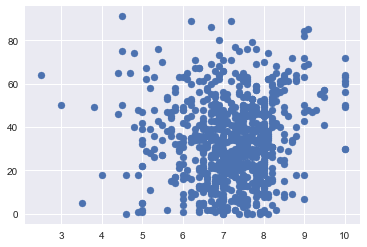

In [44]:
plt.scatter(df_2016['score'], df_2016['album_popularity'])

In [37]:
df.drop([u'genre_electronic', u'genre_experimental',
       u'genre_folk/country', u'genre_global', u'genre_jazz', u'genre_metal',
       u'genre_pop/r&b', u'genre_rap', u'genre_rock'], axis=1, inplace=True)


In [39]:
df.drop(['pub_weekday', 'year', 'pub_month'], axis=1, inplace=True)

In [45]:
df.drop([u'cont_polarity', u'cont_subjectivity', u'abs_polarity',
       u'abs_subjectivity', u'word_count', u'adj_count', u'adj_freq',
       u'score_bin', u'avg_word_length', u'adj_word_length', u'artist_y',
       u'album_name'], axis=1, inplace=True)

In [49]:
df.drop(['track_popularity'], axis=1, inplace=True)

ValueError: x and y must have same first dimension, but have shapes (19,) and (18,)

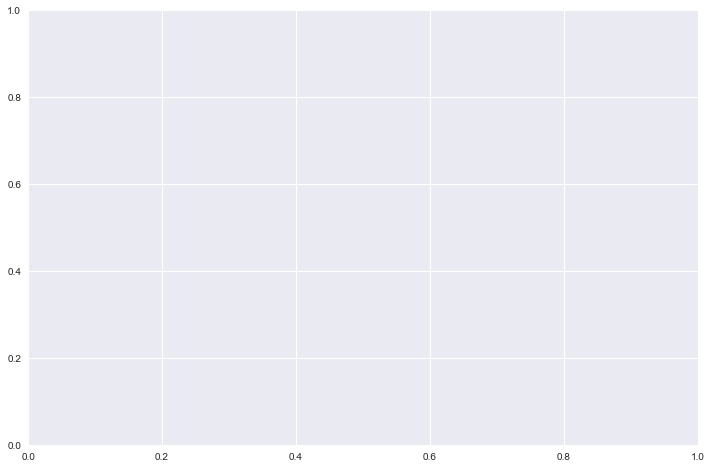

In [205]:
plt.figure(figsize=(12,8))
plt.plot(years, df[df['score'] > 9].groupby('pub_year')['valence'].mean())
plt.plot(years, df[df['score'] > 9].groupby('pub_year')['danceability'].mean())
# plt.plot(years, df[df['score'] > 9].groupby('pub_year')['liveness'].mean())
# plt.plot(years, df[df['score'] > 9].groupby('pub_year')['acousticness'].mean())
plt.plot(years, df[df['score'] > 9].groupby('pub_year')['energy'].mean())
plt.legend()
plt.show()

In [219]:
df[(df['instrumentalness'] > .6) & (df['energy'] < .4) & (df['score'] >= 8) & (df['content'].str.contains('ambient'))]

,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,author,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,year,num_years_since_release
83,146,168,59f35307e68f6520a90c0afb,phantom brickworks,bibio,https://pitchfork.com/reviews/albums/bibio-pha...,8.2,0,0,andy beta,...,0.970111,0.869222,0.114567,0.108233,81.852556,4.885081e+05,4.222222,7.111111,2017.0,0.0
162,265,287,59c14dd09a887f6ba1bd7b02,new energy,four tet,https://pitchfork.com/reviews/albums/four-tet-...,8.0,0,0,andy beta,...,0.781571,0.723409,0.150829,0.287186,109.508929,2.419421e+05,3.785714,22.785714,2017.0,0.0
447,687,714,5929e802c0084474cd0c50fe,balsams,chuck johnson,https://pitchfork.com/reviews/albums/23275-chu...,8.1,0,0,marc masters,...,0.791667,0.895333,0.104083,0.079833,98.014167,4.135813e+05,3.000000,27.000000,2017.0,0.0
696,1064,1114,5929d8f013d197565213cc3d,no home of the mind,bing & ruth,https://pitchfork.com/reviews/albums/22888-bin...,8.2,0,0,mark richardson,...,0.921300,0.850300,0.103560,0.041340,75.969600,3.562898e+05,3.800000,36.300000,2017.0,0.0
698,1067,1117,5929d8ef0c2bba1b7de021ae,an act of love,earthen sea,https://pitchfork.com/reviews/albums/22896-ear...,8.1,0,0,andy beta,...,0.732875,0.823000,0.122088,0.196300,93.302000,2.887431e+05,3.750000,25.125000,2017.0,0.0
793,1240,1296,5929d9745e6ef959693247d9,clear sounds/perfetta,harry bertoia,https://pitchfork.com/reviews/albums/22715-cle...,8.0,0,0,marc masters,...,0.297000,0.730000,0.120000,0.025600,84.188000,1.020636e+06,4.000000,1.500000,2016.0,1.0
834,1320,1381,5929d9b00c2bba1b7de02263,what you get for being young,suzanne kraft,https://pitchfork.com/reviews/albums/22535-suz...,8.0,0,0,philip sherburne,...,0.587021,0.909429,0.153714,0.336429,104.257857,3.357420e+05,4.000000,15.571429,2016.0,0.0
1016,1585,1661,5929da7bd7a71d1ea5699be3,another green world,brian eno,https://pitchfork.com/reviews/albums/22061-ano...,10.0,0,0,mike powell,...,0.673429,0.622774,0.119800,0.354614,118.398429,1.753761e+05,3.642857,35.142857,1975.0,41.0
1031,1617,1696,5929da945e6ef959693248ef,goodbye to language,daniel lanois,https://pitchfork.com/reviews/albums/22289-goo...,8.1,0,0,philip sherburne,...,0.887250,0.856333,0.105883,0.047692,87.703417,1.838608e+05,3.416667,20.666667,2016.0,0.0
1146,1814,1902,5929db29c0084474cd0c4623,sketches from an island 2,mark barrott,https://pitchfork.com/reviews/albums/22062-ske...,8.0,0,0,andy beta,...,0.756556,0.908556,0.147800,0.391889,122.425667,2.919342e+05,4.000000,17.888889,2016.0,0.0


In [218]:
df[df['artist'].str.contains('william basinski')]

,Unnamed: 0,index,reviewid,title,artist,url,score,best_new_music,best_new_reissue,author,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track_popularity,year,num_years_since_release
779,1210,1265,5929d96013d197565213cc9e,a shadow in time,william basinski,https://pitchfork.com/reviews/albums/22738-a-s...,7.9,0,0,daniel martin-mccormick,...,0.8220,0.880000,0.07090,0.25250,104.002000,1.299536e+06,4.5,29.500000,2017.0,0.0
1046,1640,1720,5929daa20c2bba1b7de0235b,92982,william basinski,https://pitchfork.com/reviews/albums/22277-wil...,8.7,1,1,kevin lozano,...,0.9640,0.899000,0.13685,0.04030,113.158000,9.412768e+05,4.0,24.750000,2009.0,7.0
2485,4405,4634,5929e318c0084474cd0c4e26,melancholia,william basinski,https://pitchfork.com/reviews/albums/19246-wil...,7.4,0,0,nick neyland,...,0.9825,0.872714,0.11095,0.07090,85.217357,1.999572e+05,3.5,30.357143,2003.0,11.0
2697,5323,5597,5929e5ba0c2bba1b7de02e5e,nocturnes,william basinski,https://pitchfork.com/reviews/albums/18282-wil...,7.5,0,0,nick neyland,...,0.9885,0.881500,0.09965,0.03735,103.076000,2.069500e+06,3.5,10.000000,2003.0,10.0
4456,17235,17939,5929d8960c2bba1b7de0214e,the river,william basinski,https://pitchfork.com/reviews/albums/576-the-r...,8.8,0,0,andy beta,...,0.5555,0.926500,0.36500,0.07825,78.214500,2.812614e+06,3.5,9.000000,2007.0,-4.0


In [65]:
import difflib

In [68]:
df2 = df

In [69]:
df2.title = df_spot_grouped.title.map(lambda x: difflib.get_close_matches(x, df_spot_grouped.title)[0])

KeyboardInterrupt: 